In [1]:
import numpy as np
import pandas as pd
import os
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [2]:
for dirname, _, filenames in os.walk('D:\brain_tumor_dataset\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Let's Import Required Libraries**

In [3]:
import os
import keras 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# **One Hot Encoding the Target Classes**

In [4]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]]) 

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# **Creating 3 Important Lists** 
1. data list for storing image data in numpy array form
2. paths list for storing paths of all images
3. result list for storing one hot encoded form of target class whether normal or tumor  

In [5]:
# This cell updates result list for images with tumor

data = []
paths = []
result = []

for r, d, f in os.walk(r'D:\brain_tumor_dataset\data\yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [6]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"D:\brain_tumor_dataset\data\no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [7]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [8]:
result = np.array(result)
result = result.reshape(139,2)

# **Splitting the Data into Training & Testing**

In [9]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# **Model Building**

In [10]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))



In [11]:
y_train.shape

(111, 2)

In [12]:
import tensorflow as tf

In [13]:
filepath='D://brain_tumor_dataset/S/aved_Model//checkpoints'

In [14]:
callback =EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',mode='min',save_best_only=True,verbose=1)

In [15]:
model.compile(tf.keras.optimizers.Adam(lr=2e-5), loss='binary_crossentropy', metrics=['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
history = model.fit(x_train, y_train, epochs = 30, batch_size =32, verbose = 1,validation_data = (x_test, y_test),callbacks=[callback,checkpoint])

Epoch 1/30
4/4 [==============================] - ETA: 0s - loss: 1.6594 - accuracy: 0.4595
Epoch 00001: val_loss improved from inf to 2.08302, saving model to D:\brain_tumor_dataset\checkpoints
INFO:tensorflow:Assets written to: D:\brain_tumor_dataset\checkpoints\assets
4/4 [==============================] - 13s 4s/step - loss: 1.6594 - accuracy: 0.4595 - val_loss: 2.0830 - val_accuracy: 0.7500
Epoch 2/30
4/4 [==============================] - ETA: 0s - loss: 0.9096 - accuracy: 0.7117
Epoch 00002: val_loss improved from 2.08302 to 1.24034, saving model to D:\brain_tumor_dataset\checkpoints
INFO:tensorflow:Assets written to: D:\brain_tumor_dataset\checkpoints\assets
4/4 [==============================] - 17s 5s/step - loss: 0.9096 - accuracy: 0.7117 - val_loss: 1.2403 - val_accuracy: 0.8214
Epoch 3/30
4/4 [==============================] - ETA: 0s - loss: 0.8788 - accuracy: 0.7297
Epoch 00003: val_loss improved from 1.24034 to 0.99574, saving model to D:\brain_tumor_dataset\checkpoints

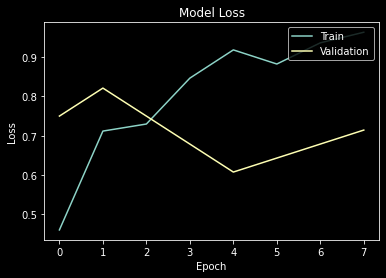

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [23]:
def names(number):
    if number==0:
        return 'Sorry this person affect by tumor'
    else:
        return 'Thank God, Its not a tumor'

93.27893257141113% Confidence  Thank God, Its not a tumor


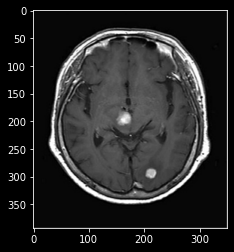

In [27]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:\brain_tumor_dataset/data/no/N17.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence  ' + names(classification))

88.75309228897095% Confidence,Sorry this person affect by tumor


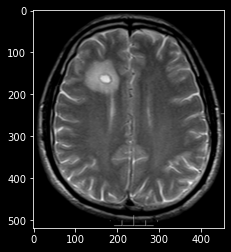

In [30]:
from matplotlib.pyplot import imshow
img = Image.open(r"D:\brain_tumor_dataset/data/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence,' + names(classification))